# La Felicidad en España: Un análisis multivariante

In [2]:
# Operaciones numéricas, matrices y dataframes
import numpy as np
import pandas as pd
from pandas import read_csv

# Extracción

In [37]:
# Lectura del Dataset
# Datos abiertos Encuesta de Condiciones de Vida 2022 - INE
# https://www.ine.es/dyngs/INEbase/es/operacion.htm?c=Estadistica_C&cid=1254736176807&menu=resultados&idp=1254735976608#!tabs-1254736195153

df = pd.read_csv("ECV_Tp_2022.csv",delimiter='\t')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50147 entries, 0 to 50146
Columns: 263 entries, PB010 to PS102_F
dtypes: float64(49), int64(135), object(79)
memory usage: 100.6+ MB


In [39]:
# Eliminación de columnas de marca y variables de identificación y control (para EDA solamente)
# Ver tablas de metadatos y resumen de variables; persisten las variables input y la objetivo en total 121
dfEda = df[['PB140','PB150','PB190','PB200','PB205','PB230','PB240','PE010','PE021',
            'PE041','PL032','PL016','PL040A','PL040B','PL051A','PL051B','PL060',
            'PL073','PL074','PL075','PL076','PL080','PL085','PL086','PL087','PL089',
            'PL090','PL100','PL111AA','PL111BA','PL141','PL145','PL150','PL200',
            'PL211A','PL211B','PL211C','PL211D','PL211E','PL211F','PL211G','PL211H',
            'PL211I','PL211J','PL211K','PL211L','PL271','PH010','PH020','PH030',
            'PH040','PH050','PH060','PH070','PY010N','PY020N','PY021N','PY035N',
            'PY050N','PY080N','PY090N','PY100N','PY110N','PY120N','PY130N','PY140N',
            'PY010G','PY020G','PY021G','PY030G','PY035G','PY050G','PY080G','PY090G',
            'PY100G','PY110G','PY120G','PY130G','PY140G','PD020','PD030','PD050',
            'PD060','PD070','PD080','PH080','PH090','PH100','PH110','PH122','PH132',
            'PH142','PH152','PH101','PH111','PH121','PH131','PH141','PH151','PH171',
            'PH180','PW241','PW030','PW160','PW120','PW230','PW090','PW180','PS010',
            'PS020','PS030','PS040','PS042','PS041','PS050','PS060','PS070','PS080',
            'PS110','PS111','PS102']].copy()

# Exploración

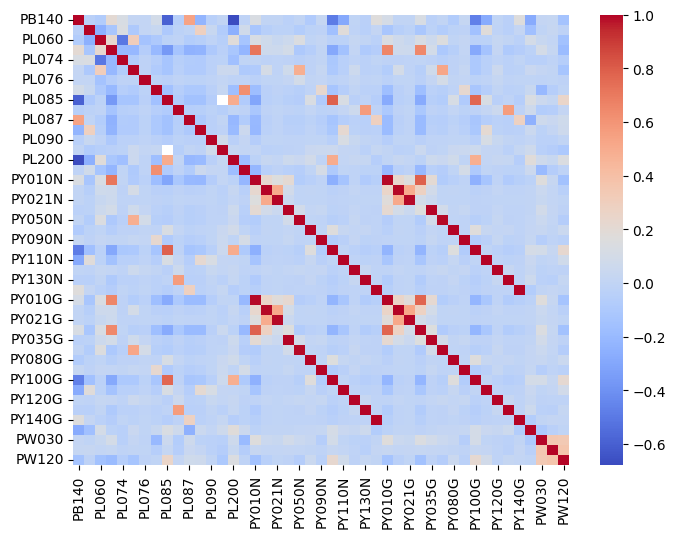

In [40]:
# módulo graficador
import matplotlib.pyplot as plt
import seaborn as sns

# matriz de correlación - variables numéricas
corr = dfEda.select_dtypes(include=['int64', 'float64']).corr()

# Crear una figura de matplotlib
plt.figure(figsize=(8, 6))
# Crear el heatmap utilizando seaborn
sns.heatmap(corr, annot=False, cmap='coolwarm')
# Ajustar el espaciado para evitar que se corte la parte superior e inferior
plt.subplots_adjust(top=0.95, bottom=0.2)
# Mostrar el gráfico
plt.show()

# Limpieza y Transformación

In [41]:
# Clasificación de valores NA - Previo al EDA formal (sin variables de marca)
# Sobre el dataset inicial df que copiamos en df3 (con variables de marca necesarias para tratamiento de datos)
df31 = df.copy()
# Eliminamos vbles de id u otras de no interes -- solo se deja el ID de fila 'PB030'
columnas_a_eliminar = ['PB010', 'PB020', 'PB040', 'PB100', 'PB110', 'PB120', 'PB160', 'PB170', 'PB180']

# Eliminar las columnas especificadas
df3 = df.drop(columns = columnas_a_eliminar)

In [42]:
#Reemplazos variables categoricas nominales
df3.loc[df3['PE021_F'] == -2, 'PE021'] = 'NA'
df3.loc[df3['PL016_F'] == -2, 'PL016'] = 'NA'
df3.loc[df3['PL040A_F'] == -2, 'PL040A'] = 'NA'
df3.loc[df3['PL040B_F'] == -2, 'PL040B'] = 'NA'
df3.loc[df3['PL051A_F'] == -2, 'PL051A'] = 'NA'
df3.loc[df3['PL051B_F'] == -2, 'PL051B'] = 'NA'
df3.loc[df3['PL111AA_F'] == -2, 'PL111AA'] = 'NA'
df3.loc[df3['PL111BA_F'] == -2, 'PL111BA'] = 'NA'
df3.loc[df3['PL141_F'] == -2, 'PL141'] = 'NA'
df3.loc[df3['PL145_F'] == -2, 'PL145'] = 'NA'
df3.loc[df3['PL150_F'] == -2, 'PL150'] = 'NA'
df3.loc[df3['PH040_F'] == -2, 'PH040'] = 'NA'
df3.loc[df3['PH050_F'] == -2, 'PH050'] = 'NA'
df3.loc[df3['PH060_F'] == -2, 'PH060'] = 'NA'
df3.loc[df3['PH070_F'] == -2, 'PH070'] = 'NA'
df3.loc[df3['PH122_F'] == -2, 'PH122'] = 'NA'

In [43]:
#caso variables asignar cero(0) PL060, PL100, PL200, PL271
df3.loc[df3['PL060_F'] == -2, 'PL060'] = 0
df3.loc[df3['PL100_F'] == -2, 'PL100'] = 0
df3.loc[df3['PL100_F'] == -4, 'PL100'] = 0
df3.loc[df3['PL200_F'] == -2, 'PL200'] = 0
df3.loc[df3['PL271_F'] == -2, 'PL271'] = 0

In [44]:
# Contar cantidad de atributos faltantes por registro (suma de -1)

# Definimos las columnas de interés 121
# Definimos las columnas de interés 96, para buscar marcas de ausentes. las vables de renta no tienen ausentes por eso no estan aqui
columnas_de_interes = ['PB190_F','PB200_F','PB205_F','PB230_F','PB240_F','PE010_F','PE021_F',
'PE041_F','PL032_F','PL016_F','PL040A_F','PL040B_F','PL051A_F','PL051B_F',
'PL060_F','PL073_F','PL074_F','PL075_F','PL076_F','PL080_F','PL085_F',
'PL086_F','PL087_F','PL089_F','PL090_F','PL100_F','PL111AA_F','PL111BA_F',
'PL141_F','PL145_F','PL150_F','PL200_F','PL211A_F','PL211B_F','PL211C_F',
'PL211D_F','PL211E_F','PL211F_F','PL211G_F','PL211H_F','PL211I_F',
'PL211J_F','PL211K_F','PL211L_F','PL271_F','PH010_F','PH020_F','PH030_F',
'PH040_F','PH050_F','PH060_F','PH070_F','PD020_F','PD030_F','PD050_F',
'PD060_F','PD070_F','PD080_F','PW010_F','PW191_F','PH080_F','PH090_F',
'PH100_F','PH110_F','PH122_F','PH132_F','PH142_F','PH152_F','PH101_F',
'PH111_F','PH121_F','PH131_F','PH141_F','PH151_F','PH171_F','PH180_F',
'PW241_F','PW030_F','PW160_F','PW120_F','PW230_F','PW090_F','PW180_F',
'PS010_F','PS020_F','PS030_F','PS040_F','PS042_F','PS041_F','PS050_F',
'PS060_F','PS070_F','PS080_F','PS110_F','PS111_F','PS102_F']

#solo para tener en cuenta los valores -1
mascara = df3[columnas_de_interes] == -1

df3['Suma'] = df3[columnas_de_interes][mascara].sum(axis=1) * -1

# Definimos un valor límite
# valor_limite = 29 #filas (que le falte mas del 30 % de atributos)
# valor_limite = 49 #filas (que le falte mas del 50 % de atributos 48+1)
valor_limite = 77 #filas (que le falte mas del 80 % de atributos)

# Filtramos las filas cuya suma supere el valor límite
filas_superiores_a_limite = df3[df3['Suma'] > valor_limite]

In [45]:
# eliminamos las filas anteriores
df4 = df3[df3['Suma'] <= valor_limite]

In [46]:
# Una vez reemplazados los ' ' vacios detectados como y marcados como NA
# Reemplazar los espacios en blanco por NaN en todas las columnas del DataFrame, una vez los NA se han categorizado solo reemplaza verdaderos missings
df4 = df4.copy() #para evitar warnings pandas

df4.replace([' ', '  ', '   '], np.nan, inplace=True)
df4.replace([' 0', '  0'], '0', inplace=True)

#se quitan espacios de las columnas que pueden ser float64 y actualmente son cadena
col_esp = ['PW241', 'PW191', 'PW010']  # Lista de nombres de columnas que deseas limpiar
   
# Aplicar str.strip() a todas las columnas especificadas en la lista
df4[col_esp] = df4[col_esp].apply(lambda x: x.str.strip())

In [47]:
#separamos por tipo de vables si fuera necesario para cada prueba, se encontraron funciones que pueden usar ambos tipos de vables con df4
df_object = df4.select_dtypes(include=['object'])
# convertir PB030 en numerico para qu el ID tambien quede en el df_number
df4['PB030'] = df4['PB030'].astype('float64')
df_number = df4.select_dtypes(include=['float64'])

In [48]:
#Debemos eliminar las ordinales del object para que solo queden nominales - categoricas puras
df31 = df.copy()
columnas_a_eliminar = ['PE041','PH010','PH030','PW010','PW191','PH080','PH090','PH100','PH132',
                       'PH142','PH152','PH101','PH111','PH121',
                       'PH131','PH141','PH151','PH171','PH180','PW241','PW230','PW090']
                      #'PW030','PW160','PW120', estan numericas
# Eliminar las columnas especificadas
df_object = df_object.drop(columns = columnas_a_eliminar)

In [49]:
# Columnas de interés
columnas_moda = ['PL211A', 'PL211B', 'PL211C','PL211D','PL211E','PL211F','PL211G','PL211H',
                       'PL211I','PL211J','PL211K','PL211L']

# Función para calcular la moda de las columnas de interés en una fila
def calcular_moda_fila(fila):
    moda = fila[columnas_moda].mode()
    if moda.empty:  # Si la moda está vacía (no hay moda), retorna un valor predeterminado o NaN
        return 'NC'
    else:
        return moda.iloc[0]  # Calcula la moda y obtiene el primer valor (en caso de que haya múltiples modas)

# Crear una nueva columna en cada fila con la moda calculada
nombre_columna_nueva = 'ACTI'
df_object[nombre_columna_nueva] = df_object.apply(calcular_moda_fila, axis=1)

# Visualizar el DataFrame con la nueva columna
df_object.head(5)

,PB190,PB200,PB205,PB230,PB240,PE010,PE021,PL032,PL016,PL040A,PL040B,PL051A,PL051B,PL111AA,PL111BA,PL141,PL145,PL150,PL211A,PL211B,PL211C,PL211D,PL211E,PL211F,PL211G,PL211H,PL211I,PL211J,PL211K,PL211L,PH020,PH040,PH050,PH060,PH070,PD020,PD030,PD050,PD060,PD070,PD080,PH122,PW180,PS010,PS020,PS030,PS040,PS042,PS041,PS050,PS060,PS070,PS080,PS110,PS111,PS102,ACTI
0,2,1,1,1,1,2,NA,1,NA,3,NA,91,NA,q,NA,21,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,NA,NA,NA,NA,1,1,3,3,3,1,3,2,7,3,3,2,2,6,1,4,2,4,6,2,2,2
1,2,1,1,1,1,2,NA,1,NA,3,NA,71,NA,c,NA,21,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,NA,1,1,1,1,3,3,3,1,4,1,8,4,4,2,5,6,2,3,2,2,6,2,1,1
2,2,1,1,1,1,2,NA,4,3,NA,3,NA,72,NA,d,NA,NA,NA,8,8,8,8,8,8,8,8,8,8,8,8,1,2,NA,2,NA,1,1,3,3,1,1,NA,1,7,7,1,1,2,6,5,3,2,2,6,2,4,8
3,2,1,1,1,1,2,NA,6,3,NA,3,NA,51,NA,i,NA,NA,NA,10,10,10,10,10,10,10,10,10,10,10,10,2,NA,NA,2,NA,1,1,1,3,1,1,NA,1,7,7,2,4,1,6,5,1,1,2,6,2,2,10
4,1,3,2,1,1,2,NA,1,NA,3,NA,93,NA,g,NA,21,1,2,1,1,1,1,1,1,1,1,1,1,1,1,2,NA,NA,NA,NA,1,1,1,1,1,1,3,1,7,4,4,2,6,6,1,1,1,1,6,2,2,1


In [50]:
#Eliminamos las columnas de actividad para cada mes
df_object = df_object.drop(columns = columnas_moda)
#reemplazamos donde la moda haya quedado 'NC' por nan
df_object['ACTI'] = df_object['ACTI'].replace('NC', np.nan)

In [51]:
#one-hot encoding creacion de variables dummys para categoricas nominales
cat_variables = df_object
cat_dummies = pd.get_dummies(cat_variables, drop_first=True).astype(int)

In [52]:
suma_por_columna = cat_dummies.sum()
#columnas_a_eliminar = suma_por_columna[suma_por_columna < 495].index #vamos a eliminar las variables dummys con menos de 1 % en observaciones = True(1)
columnas_a_eliminar = suma_por_columna[suma_por_columna < 4941].index # 10% -- para ver si por eso es la singularidad
cat_dummies2 = cat_dummies.drop(columns = columnas_a_eliminar)

In [53]:
# Mostrar el índice original
print("Índice original de columnas a eliminar:")
print(columnas_a_eliminar)

# Convertir el índice a una lista
columnas_a_eliminar_lista = columnas_a_eliminar.tolist()

# Mostrar la lista completa
print("\nLista completa de columnas a eliminar:")
print(columnas_a_eliminar_lista)

Índice original de columnas a eliminar:
Index(['PB190_3', 'PB190_4', 'PB190_5', 'PB200_2', 'PB230_2', 'PB230_3',
       'PB240_2', 'PB240_3', 'PE021_20', 'PE021_30',
       ...
       'PS110_5', 'PS102_3', 'ACTI_ 2', 'ACTI_ 3', 'ACTI_ 4', 'ACTI_ 5',
       'ACTI_ 6', 'ACTI_ 8', 'ACTI_10', 'ACTI_11'],
      dtype='object', length=216)

Lista completa de columnas a eliminar:
['PB190_3', 'PB190_4', 'PB190_5', 'PB200_2', 'PB230_2', 'PB230_3', 'PB240_2', 'PB240_3', 'PE021_20', 'PE021_30', 'PE021_34', 'PE021_35', 'PE021_40', 'PE021_45', 'PE021_50', 'PL032_ 2', 'PL032_ 4', 'PL032_ 5', 'PL032_ 6', 'PL032_ 8', 'PL016_2', 'PL040A_2', 'PL040A_4', 'PL040B_2', 'PL040B_4', 'PL051A_ 2', 'PL051A_ 3', 'PL051A_11', 'PL051A_12', 'PL051A_13', 'PL051A_14', 'PL051A_21', 'PL051A_22', 'PL051A_23', 'PL051A_24', 'PL051A_25', 'PL051A_26', 'PL051A_31', 'PL051A_32', 'PL051A_33', 'PL051A_34', 'PL051A_35', 'PL051A_41', 'PL051A_42', 'PL051A_43', 'PL051A_44', 'PL051A_51', 'PL051A_52', 'PL051A_53', 'PL051A_54', 'PL051A

In [54]:
columnas_a_eliminar_lista

['PB190_3',
 'PB190_4',
 'PB190_5',
 'PB200_2',
 'PB230_2',
 'PB230_3',
 'PB240_2',
 'PB240_3',
 'PE021_20',
 'PE021_30',
 'PE021_34',
 'PE021_35',
 'PE021_40',
 'PE021_45',
 'PE021_50',
 'PL032_ 2',
 'PL032_ 4',
 'PL032_ 5',
 'PL032_ 6',
 'PL032_ 8',
 'PL016_2',
 'PL040A_2',
 'PL040A_4',
 'PL040B_2',
 'PL040B_4',
 'PL051A_ 2',
 'PL051A_ 3',
 'PL051A_11',
 'PL051A_12',
 'PL051A_13',
 'PL051A_14',
 'PL051A_21',
 'PL051A_22',
 'PL051A_23',
 'PL051A_24',
 'PL051A_25',
 'PL051A_26',
 'PL051A_31',
 'PL051A_32',
 'PL051A_33',
 'PL051A_34',
 'PL051A_35',
 'PL051A_41',
 'PL051A_42',
 'PL051A_43',
 'PL051A_44',
 'PL051A_51',
 'PL051A_52',
 'PL051A_53',
 'PL051A_54',
 'PL051A_61',
 'PL051A_62',
 'PL051A_71',
 'PL051A_72',
 'PL051A_73',
 'PL051A_74',
 'PL051A_75',
 'PL051A_81',
 'PL051A_82',
 'PL051A_83',
 'PL051A_91',
 'PL051A_92',
 'PL051A_93',
 'PL051A_94',
 'PL051A_96',
 'PL051B_ 2',
 'PL051B_ 3',
 'PL051B_11',
 'PL051B_12',
 'PL051B_13',
 'PL051B_14',
 'PL051B_21',
 'PL051B_22',
 'PL051B_23'

In [55]:
# Lista de columnas que deseas incluir en el nuevo DataFrame para convertir a float64
columnas_deseadas = ['PE041', 'PH010', 'PH030', 'PW010', 'PW191', 'PH080', 'PH090', 'PH100', 
                     'PH132', 'PH142', 'PH152', 'PH101', 'PH111', 'PH121', 'PH131', 'PH141', 'PH151', 'PH171',
                     'PH180', 'PW241', 'PW230', 'PW090']
                    #'PW030', 'PW160', 'PW120' estan numericas
# Crear un nuevo DataFrame con las columnas seleccionadas
ordinales = df4[columnas_deseadas].copy()

In [56]:
conv_ord = ordinales.copy()  # Crear una copia para no modificar el original

for col in conv_ord.columns:
    conv_ord[col] = conv_ord[col].map(lambda x: int(x) if isinstance(x, str) and x.isdigit() else x)

In [57]:
# crear lista de numericas puras y unir --29 mas ID - Omito aqui las variables de renta bruta PY010G, PY020G, PY021G
# PY035G, PY050G, PY080G, PY090G, PY100G, PY110G, PY120G, PY130G, PY140G

col_num = ['PB030','PB140','PL060','PL073','PL074','PL075','PL076','PL080','PL085',
           'PL086','PL087','PL089','PL090','PL100','PL200','PL271','PY010N',
           'PY020N','PY021N','PY035N','PY050N','PY080N','PY090N','PY100N',
           'PY110N','PY120N','PY130N','PY140N','PY030G','PH110']

# Crear un nuevo DataFrame con las columnas seleccionadas
numericas = df4[col_num].copy()

In [58]:
# creamos vble Edad
año = 2022
# Crea la columna de edad restando el año actual del año de nacimiento
numericas['EDAD'] = año - df['PB140']
numericas = numericas.drop(columns=['PB140'])

In [59]:
#union de dataframes de tipos de vables
df5 = pd.concat([numericas, conv_ord, cat_dummies2], axis=1)

In [ ]:
#cat_dummies2['PW160']

In [60]:
def little_mcar_test(data, alpha=0.05):
    """
    Performs Little's MCAR (Missing Completely At Random) test on a dataset with missing values.
    """
    data = pd.DataFrame(data)
    data.columns = ['x' + str(i) for i in range(data.shape[1])]
    data['missing'] = np.sum(data.isnull(), axis=1)
    n = data.shape[0]
    k = data.shape[1] - 1
    df = k * (k - 1) / 2
    chi2_crit = chi2.ppf(1 - alpha, df)
    chi2_val = ((n - 1 - (k - 1) / 2) ** 2) / (k - 1) / ((n - k) * np.mean(data['missing']))
    p_val = 1 - chi2.cdf(chi2_val, df)
    if chi2_val > chi2_crit:
        print(
            'Reject null hypothesis: Data is not MCAR (p-value={:.4f}, chi-square={:.4f})'.format(p_val, chi2_val)
        )
    else:
        print(
            'Do not reject null hypothesis: Data is MCAR (p-value={:.4f}, chi-square={:.4f})'.format(p_val, chi2_val)
        )

In [61]:
# Prueba de aletoriedad de ausentes MCAR
from scipy.stats import chi2

little_mcar_test(df5, alpha=0.05)  #Todos los tipos de variables

Do not reject null hypothesis: Data is MCAR (p-value=1.0000, chi-square=1307.7595)


In [63]:
df5['PB030']

0            101.0
1            102.0
2            201.0
3            202.0
4            203.0
           ...    
50142    3301302.0
50143    3301401.0
50144    3301402.0
50145    3301501.0
50146    3301502.0
Name: PB030, Length: 49406, dtype: float64

# Estandarización

In [31]:
# Estandarizacion de datos
from sklearn.preprocessing import StandardScaler# Estandarizacion de datos
from sklearn.preprocessing import StandardScaler

df_id = df5['PB030']
df_sin_id = df5.drop(columns=['PB030'])

scaler = StandardScaler()
df6 = pd.DataFrame(scaler.fit_transform(df_sin_id), columns=df_sin_id.columns)

# Resetear los índices de ambos DataFrames
df_id.reset_index(drop=True, inplace=True)
df6.reset_index(drop=True, inplace=True)

df7 = pd.concat([df_id, df6 ], axis=1)

In [32]:
df7

,PB030,PL060,PL073,PL074,PL075,PL076,PL080,...,PS080_2,PS080_3,PS110_6,PS111_2,PS102_2,PS102_4,ACTI_ 7
0,101.0,-0.583388,-0.772393,3.835400,-0.269792,-0.08107,-0.330982,...,-0.654471,-0.382958,0.334920,0.271938,0.759807,-0.592451,-0.473939
1,102.0,1.038704,1.351686,-0.279304,-0.269792,-0.08107,-0.330982,...,1.527952,-0.382958,0.334920,0.271938,-1.316123,-0.592451,-0.473939
2,201.0,-0.927468,-0.772393,-0.279304,-0.269792,-0.08107,-0.330982,...,1.527952,-0.382958,0.334920,0.271938,-1.316123,1.687904,-0.473939
3,202.0,-0.927468,-0.772393,-0.279304,-0.269792,-0.08107,-0.330982,...,1.527952,-0.382958,0.334920,0.271938,0.759807,-0.592451,-0.473939
4,203.0,1.038704,1.351686,-0.279304,-0.269792,-0.08107,-0.330982,...,-0.654471,-0.382958,0.334920,0.271938,0.759807,-0.592451,-0.473939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49401,3301302.0,1.038704,-0.772393,-0.279304,-0.269792,-0.08107,-0.330982,...,1.527952,-0.382958,0.334920,0.271938,-1.316123,-0.592451,-0.473939
49402,3301401.0,-0.927468,1.174680,-0.279304,-0.269792,-0.08107,-0.017905,...,-0.654471,-0.382958,0.334920,0.271938,0.759807,-0.592451,-0.473939
49403,3301402.0,-0.927468,-0.772393,-0.279304,-0.269792,-0.08107,-0.330982,...,-0.654471,-0.382958,0.334920,0.271938,0.759807,-0.592451,-0.473939
49404,3301501.0,-0.534234,-0.772393,-0.279304,-0.269792,12.69390,-0.330982,...,-0.654471,2.611253,0.334920,-3.677313,-1.316123,1.687904,-0.473939


# Imputación

In [33]:
# Imputación de missings completa , (con k=3 , 3 min)
from sklearn.impute import KNNImputer
from numpy import isnan
# load the dataset

# retrieve the numpy array
#values = df_number.values

values = df7.values

# define the imputer
imputer = KNNImputer(n_neighbors=3)

# transform the dataset
# transformed_values = np.round(imputer.fit_transform(values)) sino estuvieran estandarizados se deberian devolver enteros imputados

transformed_values = imputer.fit_transform(values)

# count the number of NaN values in each column
print(f'Missing: {isnan(transformed_values).sum()}')

Missing: 0


In [34]:
# devolver el array al df
columnas = df7.columns.tolist()
dfModel = pd.DataFrame(transformed_values, columns = columnas)

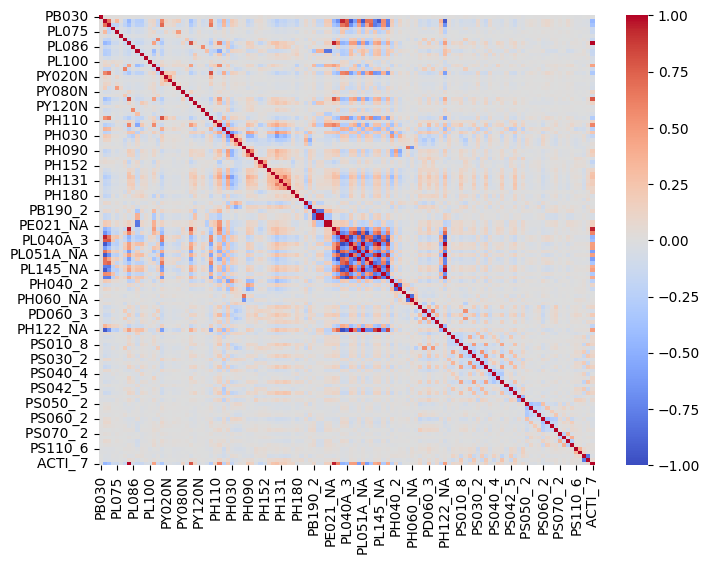

In [35]:
# módulo graficador
import matplotlib.pyplot as plt
import seaborn as sns

# matriz de correlacion - variables numericas
corr = dfModel.corr()

# Crear una figura de matplotlib
plt.figure(figsize=(8, 6))
# Crear el heatmap utilizando seaborn
sns.heatmap(corr, annot=False, cmap='coolwarm')
# Ajustar el espaciado para evitar que se corte la parte superior e inferior
plt.subplots_adjust(top=0.95, bottom=0.2)
# Mostrar el gráfico
plt.show()

# Transformaciones adicionales

In [36]:
# Calcula la matriz de correlación
corr_matrix = dfModel.corr()

# Encuentra pares de variables altamente correlacionadas
threshold = 0.97  # Establece tu umbral aquí
correlated_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):  # i+1 asegura no duplicar pares ni comparar variables consigo mismas
        if abs(corr_matrix.iloc[i, j]) > threshold:
            correlated_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Imprime los pares de variables altamente correlacionadas
for pair in correlated_pairs:
    print(f"{pair[0]} y {pair[1]} tienen una correlación de {pair[2]:.2f}")

PL085 y ACTI_ 7 tienen una correlación de 1.00
PB200_3 y PB205_2 tienen una correlación de 1.00
PE010_2 y PE021_NA tienen una correlación de 0.99
PL016_3 y PL040B_NA tienen una correlación de -1.00
PL016_3 y PL051B_NA tienen una correlación de -1.00
PL016_NA y PL040A_NA tienen una correlación de -1.00
PL016_NA y PL051A_NA tienen una correlación de -1.00
PL016_NA y PL145_NA tienen una correlación de -1.00
PL016_NA y PH122_NA tienen una correlación de -1.00
PL040A_3 y PL141_NA tienen una correlación de -1.00
PL040A_3 y PL150_NA tienen una correlación de -1.00
PL040A_NA y PL051A_NA tienen una correlación de 1.00
PL040A_NA y PL145_NA tienen una correlación de 1.00
PL040A_NA y PH122_NA tienen una correlación de 1.00
PL040B_NA y PL051B_NA tienen una correlación de 1.00
PL051A_NA y PL145_NA tienen una correlación de 1.00
PL051A_NA y PH122_NA tienen una correlación de 1.00
PL141_NA y PL150_NA tienen una correlación de 1.00
PL145_NA y PH122_NA tienen una correlación de 1.00


In [37]:
# se deben revisar los casos y eliminar una de cada par por multicolinealidad
# se priorizan dummies, NAs y orden de pregunta en el cuestionario
eliminar_multi = ['ACTI_ 7','PB205_2','PE021_NA','PL040B_NA', 'PL051B_NA', 'PL040A_NA', 'PL051A_NA', 'PL145_NA', 'PH122_NA', 'PL141_NA', 'PL150_NA']
# Eliminar las columnas especificadas
dfModel = dfModel.drop(columns = eliminar_multi)

In [38]:
# Calcula la matriz de correlación
corr_matrix = dfModel.corr()

# Encuentra pares de variables altamente correlacionadas
threshold = 0.97  # Establece tu umbral aquí
correlated_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):  # i+1 asegura no duplicar pares ni comparar variables consigo mismas
        if abs(corr_matrix.iloc[i, j]) > threshold:
            correlated_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Imprime los pares de variables altamente correlacionadas
for pair in correlated_pairs:
    print(f"{pair[0]} y {pair[1]} tienen una correlación de {pair[2]:.2f}")

In [39]:
# Borro la columna estandarizada
dfModel = dfModel.drop(columns=['PW090'])
# Uno la columna pw090 original (sin estandarizar)
# Realizar la unión por la columna 'PB030' y conservar todas las filas de dfModel
dfModel = pd.merge(dfModel, df4[['PB030', 'PW090']], on='PB030', how='left')

# Prueba de normalidad

In [40]:
from scipy import stats
import numpy as np

# Generar datos de ejemplo
#data = np.random.normal(loc=0, scale=1, size=100)
#data = dfModel.head(1000)
data = dfModel.head(1000).drop(columns=['PW090']) #solo numericas y sin la vble objetivo

# Realizar la prueba de Shapiro-Wilk
stat, p = stats.shapiro(data)

# Interpretar el resultado
alpha = 0.05
if p > alpha:
    print('La muestra parece seguir una distribución normal (no se rechaza H0)')
else:
    print('La muestra no parece seguir una distribución normal (se rechaza H0)')


La muestra no parece seguir una distribución normal (se rechaza H0)


C:\Users\JuanE\myenv\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# Transformacion exportar a SAS BASE - Reduccion de la dimension - Analisis Factorial

In [35]:
# Exportar para PCA en SAS - Analisis factorial metodo de factores
# Como no se evidencia normalidad multivariante n se hace analisis factorial de minimos cuadrados sino con factores

# dfModel.to_excel("Encuesta.xlsx", index=False)
dfModel.to_csv('C:/Users/JuanE/Desktop/EncuestaINE.csv', sep=',', index=False)

Aqui se ejecuta el analisis factorial en el software SAS BASE y se continua en la siguiente linea cargando el resultado

# Modelamiento

In [42]:
# Recuperamos el conjunto de datos convertido en factores resultante del analisis factorial realizado en SAS
df_factores = pd.read_excel('C:/Users/JuanE/Desktop/Factores.xlsx')

In [43]:
pd.set_option('display.max_columns', 14)
df_factores.head(3)

,PB030,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,...,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15,PW090
0,101,0.530047,-0.483462,-0.554968,0.855237,0.084918,-0.990991,...,-0.209901,0.183325,-0.263717,0.363683,0.152651,-0.986685,-1.324633
1,102,1.237696,-0.392088,-0.052377,0.401829,-0.732367,0.771218,...,-0.422137,-0.046569,0.331674,-1.052450,0.394800,0.963289,0.887367
2,201,-0.828684,1.129173,-0.464166,1.260436,0.239836,0.713693,...,-0.245249,0.105339,-0.456574,-0.746141,6.269128,-0.473027,-0.218633


In [44]:
#Unimos variable dependiente 'PW090'
df_factores = df_factores.drop(columns=['PW090'])
# Realizar la unión por la columna 'PB030' y conservar todas las filas de df_factores
df_factores = pd.merge(df_factores, df4[['PB030', 'PW090']], on='PB030', how='left')

In [45]:
df_pw090_null = df_factores[df_factores['PW090'].isna()]
df_pw090_null

,PB030,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,...,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15,PW090
113,5902,-0.650948,0.840853,1.482027,-0.381104,1.891277,-0.293609,...,-0.158115,-0.139408,-0.134958,-0.808622,-1.572492,-0.557694,NaN
153,8102,-0.817759,-0.398987,-0.718376,0.888958,0.316855,0.306834,...,-0.586887,0.447265,0.255808,0.415384,-0.041703,0.543048,NaN
191,10202,-1.042909,-1.475883,-0.666157,-2.621443,1.004619,0.748421,...,-0.176599,-1.180030,0.385957,0.077750,0.425241,0.356620,NaN
336,19402,1.270347,1.038852,0.111586,-0.482059,-0.404455,-1.336297,...,-0.563897,0.156678,0.221244,-1.068343,-0.780809,-0.495218,NaN
487,29305,1.219173,-0.206438,-0.082527,-0.935555,0.078508,0.562134,...,-0.247882,0.307288,0.798023,0.891772,-0.458158,-0.368409,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48813,3259401,1.055254,0.024916,-0.106696,-0.574927,0.121708,-1.405430,...,-0.314504,0.506669,-0.071807,0.002970,-0.340297,-0.567963,NaN
49126,3282302,-0.888273,0.462792,2.221406,0.666641,-0.316953,-1.107084,...,-0.008755,-0.603633,0.285445,-0.476099,0.578631,0.051559,NaN
49240,3291001,1.222277,-0.096852,-0.183642,0.733716,1.190656,-1.054486,...,-0.203899,0.007231,-0.839479,0.539842,0.268816,0.097588,NaN
49241,3291002,1.256001,0.031861,-0.352864,0.649587,1.235372,1.205880,...,-0.423537,-0.110842,-0.906587,-1.391868,-0.093240,-0.133138,NaN


In [46]:
df_factores_sn = df_factores.dropna(subset=['PW090'])

In [47]:
df_factores_sn['PW090'].unique()

array(['1', '3', '2', '5', '4'], dtype=object)

In [48]:
# Resetear los índices deL DataFrames
df_factores_sn.reset_index(drop=True, inplace=True)
df_factores_sn.shape[0]

47992

In [49]:
df_factores_sn.loc[df_factores_sn['PB030'] == 8102]

,PB030,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,...,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15,PW090


In [50]:
# Creo variables dicotomicas ('PW090_B1' y 'PW090_B2')
df_factores_sn.loc[:, 'PW090'] = pd.to_numeric(df_factores_sn['PW090'], errors='coerce')
df_factores_sn.loc[:, 'PW090_B2'] = np.where(df_factores_sn['PW090'] > 2, 0, 1) # Felicidad = 1 si es menor a 2, la escala esta inversa

C:\Users\JuanE\AppData\Local\Temp\ipykernel_20776\399835386.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_factores_sn.loc[:, 'PW090_B2'] = np.where(df_factores_sn['PW090'] > 2, 0, 1) # Felicidad = 1 si es menor a 2, la escala esta inversa


In [51]:
# Ajustar y transformar la columna 'PW090' para estandarizarla - Esto era para probar una regresion con vable continua
# df_factores_sn.loc[:,'PW090_est'] = scaler.fit_transform(df_factores_sn[['PW090']])
df_factores_sn

,PB030,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,...,Factor11,Factor12,Factor13,Factor14,Factor15,PW090,PW090_B2
0,101,0.530047,-0.483462,-0.554968,0.855237,0.084918,-0.990991,...,0.183325,-0.263717,0.363683,0.152651,-0.986685,1,1
1,102,1.237696,-0.392088,-0.052377,0.401829,-0.732367,0.771218,...,-0.046569,0.331674,-1.052450,0.394800,0.963289,3,0
2,201,-0.828684,1.129173,-0.464166,1.260436,0.239836,0.713693,...,0.105339,-0.456574,-0.746141,6.269128,-0.473027,2,1
3,202,-1.369023,-0.578886,-0.933100,1.538440,0.178526,-1.533514,...,0.289313,-0.112474,0.975238,-0.081118,0.158098,2,1
4,203,1.220162,-0.397163,0.181309,-1.117468,-0.988083,-1.181997,...,0.382567,0.107144,0.325068,0.300326,-0.418787,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47987,3301302,0.916949,-0.077483,-0.517024,-0.383819,-0.072323,0.962204,...,0.251079,0.490773,-0.485881,-0.101230,-0.463517,1,1
47988,3301401,-0.478594,0.328689,0.034225,-0.512514,-1.458723,0.658890,...,1.367598,-0.057078,0.753575,0.353263,0.775122,5,0
47989,3301402,-0.596103,1.828204,-0.803583,-0.209403,-1.745843,0.643652,...,-0.451846,0.267468,0.987774,-2.316872,-0.263814,5,0
47990,3301501,-0.198568,-0.010596,-0.426792,0.877498,0.261719,0.806933,...,-0.075671,-0.525580,-1.310033,0.051658,-0.543133,2,1


In [46]:
# se exporta el dataset para el modelado, por si es de interes como input en otro software
df_factores_sn.to_csv('factoresReg.csv', sep=';', index=False)

In [52]:
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from sklearn.metrics import plot_confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Revisión inicial diferentes algoritmos

In [53]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Red
## Esta primera si tenemos datos categóricos.
from sklearn.neural_network import MLPClassifier
## Esta segunda si tenemos datos numéricos.


In [54]:
target = df_factores_sn['PW090_B2'].copy()
df_factores = df_factores_sn.drop(columns = ['PB030', 'PW090', 'PW090_B2'])

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df_factores,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)  
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (35994, 15)
Number transactions y_train dataset:  (35994,)
Number transactions X_test dataset:  (11998, 15)
Number transactions y_test dataset:  (11998,)


In [56]:
# selección de algoritmos a tener en cuenta y establecimiento de medidas de rendimiento
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('XGboost', XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)))
models.append(('Red Neuronal', MLPClassifier(solver='lbfgs', alpha=0.0001, hidden_layer_sizes=(8,), max_iter=2000)))

In [57]:
# Ejecucion y resultados - tarda 20 min - se puede omitir e ir directamente a cada algoritmo
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=None)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
7,Red Neuronal,77.11,0.91,74.07,0.68
1,Random Forest,76.38,0.72,74.14,0.95
6,XGboost,76.08,0.87,73.28,0.65
2,SVM,75.91,0.83,73.54,0.85
0,Logistic Regression,75.18,0.81,70.35,0.86
5,Gaussian NB,70.12,1.24,70.40,0.74
3,KNN,67.00,0.85,69.11,0.90
4,Decision Tree Classifier,60.27,0.86,64.56,0.69


# 1. Regresion Lineal Multiple

In [52]:
# Variable Dependiente continua
X1 = df_factores_sn.drop(columns = ['PB030', 'PW090', 'PW090_B2'])
y1 = df_factores_sn['PW090'].astype('int64')

# División de los datos en train y test
X_train1, X_test1, y_train1, y_test1 = train_test_split(
                                        X1,
                                        y1.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 12345,
                                        shuffle      = True
                                    )

In [53]:
# Ajuste del modelo utilizando matrices X, y (similar a scikit-learn)
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s
# para el intercept del modelo
X_train1 = sm.add_constant(X_train1, prepend=True).rename(columns={'const':'intercept'})
modelo1  = sm.OLS(endog=y_train1, exog=X_train1)
modelo_res1 = modelo1.fit()
print(modelo_res1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     575.1
Date:                Thu, 23 May 2024   Prob (F-statistic):               0.00
Time:                        14:12:49   Log-Likelihood:                -40504.
No. Observations:               33594   AIC:                         8.104e+04
Df Residuals:                   33578   BIC:                         8.118e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.2026      0.004    499.441      0.0

# 2.Regresión logística multinomial

In [70]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [71]:
# Variable Dependiente multiclase - sin balanceo
X2 = df_factores_sn.drop(columns = ['PB030', 'PW090', 'PW090_B2'])
#y2 = df_factores_sn['PW090']
y2 = df_factores_sn['PW090'].astype('int64')

# División de los datos en train y test
X_train2, X_test2, y_train2, y_test2 = train_test_split(
                                        X2,
                                        y2.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [72]:
# formatear tipo de datos de clase para la multinomial
X_train2, X_test2 = np.array(X_train2, np.float32), np.array(X_test2, np.float32)

#X_train2, X_test2 = X_train2.reshape([-1, num_features]), X_test2.reshape([-1, num_features])

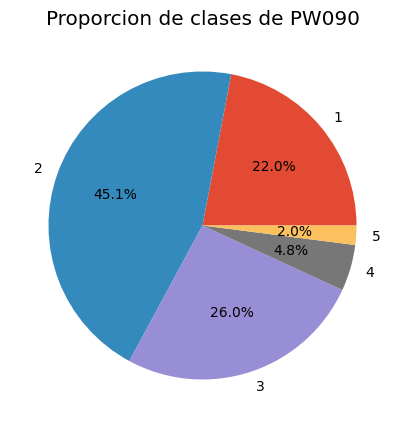

PW090
2    21648
3    12479
1    10565
4     2327
5      973
Name: count, dtype: int64


In [73]:
plt.figure(figsize=(5,5))
labels, counts = np.unique(df_factores_sn.PW090, return_counts=True)
plt.pie(counts, autopct='%1.1f%%',labels=labels)
plt.title('Proporcion de clases de PW090')
plt.show()
print(df_factores_sn.PW090.value_counts())

In [74]:
parameters = {
    'solver': ['lbfgs', 'sag', 'saga', 'newton-cg'],
    'multi_class': ['ovr', 'multinomial'],
}

# Regresion multinomial - Sin balanceo de clases
model2 = LogisticRegression()
clf2 = GridSearchCV(model2,
                   param_grid=parameters,
                   scoring='accuracy',
                   error_score='raise',
                   cv=10)

In [75]:
# entrenamiento modelo regresion lineal multinomial - 5 clases
clf2.fit(X_train2,y_train2)

GridSearchCV(cv=10, error_score='raise', estimator=LogisticRegression(),
             param_grid={'multi_class': ['ovr', 'multinomial'],
                         'solver': ['lbfgs', 'sag', 'saga', 'newton-cg']},
             scoring='accuracy')

In [76]:
# se valida el modelo y se visualizan los resultados:
#pred2 = logistic_regression(X_test2)
pred2 = clf2.predict(X_test2)

In [77]:
print('Mejores hiperparametros:', clf2.best_params_)
print('Mejores accuracy:', clf2.best_score_)

Mejores hiperparametros: {'multi_class': 'multinomial', 'solver': 'lbfgs'}
Mejores accuracy: 0.4867534892045534


In [78]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test2, pred2))
print(accuracy_score(y_test2, pred2))

[[ 154 2635  310    0    0]
 [ 152 5675  758    0    2]
 [  29 2411 1281    0    5]
 [   3  279  407    0    9]
 [   0   71  201    0   16]]
0.4949298513682456


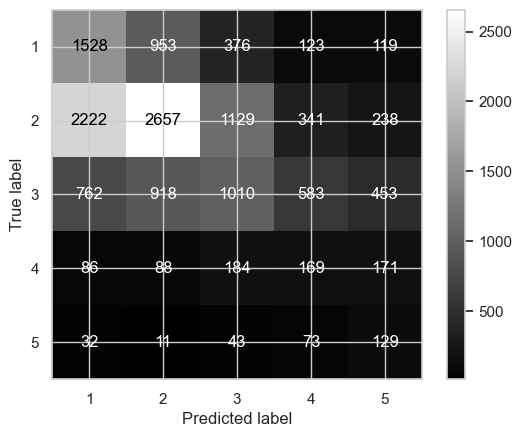

In [105]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
sns.set(style='whitegrid', context='notebook')

cm2 = confusion_matrix(y_test2, pred2, labels=clf2.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=clf2.classes_)
disp2.plot(cmap='gray');

In [92]:
# Regresion logistica multinomial - con balance de clases - no mejora el accuracy
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)

In [93]:
X_over2, y_over2 = undersample.fit_resample(X2,y2)

In [94]:
y_train2 = y_train2.astype('object')

In [95]:
# Definir los parámetros para GridSearchCV
parameters = {
    'solver': ['lbfgs', 'sag', 'saga', 'newton-cg'],
    'multi_class': ['ovr', 'multinomial'],
}

# Calcular el peso de clase para balanceo
#class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train2), y=y_train2)

# Crear el modelo de regresión logística
# model2b = LogisticRegression(class_weight=dict(enumerate(class_weights)))

#model2b = LogisticRegression()
model2b = LogisticRegression(class_weight='balanced')

# Configurar GridSearchCV
clf2b = GridSearchCV(model2b, param_grid=parameters, scoring='accuracy', cv=10)

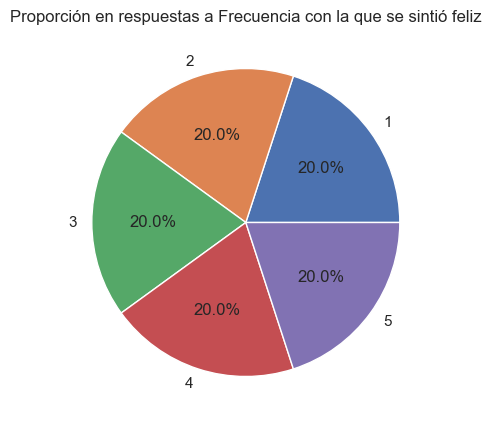

PW090
1    973
2    973
3    973
4    973
5    973
Name: count, dtype: int64


In [96]:
import matplotlib.pyplot as plt

# Calcula los valores únicos y sus recuentos
labels, counts = np.unique(df_factores_sn.PW090, return_counts=True)

mapeo_etiquetas = {
    1: "Siempre",
    2: "Casi Siempre",
    3: "Algunas veces",
    4: "Solo alguna vez",
    5: "Nunca"
}

# Aplica el mapeo a tus etiquetas
labels_descriptivas = [mapeo_etiquetas[label] for label in labels]

plt.figure(figsize=(5,5))

labels, counts = np.unique(y_over2, return_counts=True)
plt.pie(counts, autopct='%1.1f%%', labels = labels)
plt.title('Proporción en respuestas a Frecuencia con la que se sintió feliz')

plt.show()

print(y_over2.value_counts())

In [97]:
# División de los datos en train y test
X_train2, X_test2, y_train2, y_test2 = train_test_split(
                                        X2,
                                        y2.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [102]:
#con balanceo - no mejora
clf2b.fit(X_train2,y_train2)

GridSearchCV(cv=10, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'multi_class': ['ovr', 'multinomial'],
                         'solver': ['lbfgs', 'sag', 'saga', 'newton-cg']},
             scoring='accuracy')

In [103]:
print('Mejores hiperparametros:', clf2b.best_params_)
print('Mejores accuracy:', clf2b.best_score_)

Mejores hiperparametros: {'multi_class': 'ovr', 'solver': 'newton-cg'}
Mejores accuracy: 0.38438428564340293


In [106]:
pred2 = clf2b.predict(X_test2)
print(confusion_matrix(y_test2, pred2))
print(accuracy_score(y_test2, pred2))

[[1528  953  376  123  119]
 [2222 2657 1129  341  238]
 [ 762  918 1010  583  453]
 [  86   88  184  169  171]
 [  32   11   43   73  129]]
0.3815113210168079


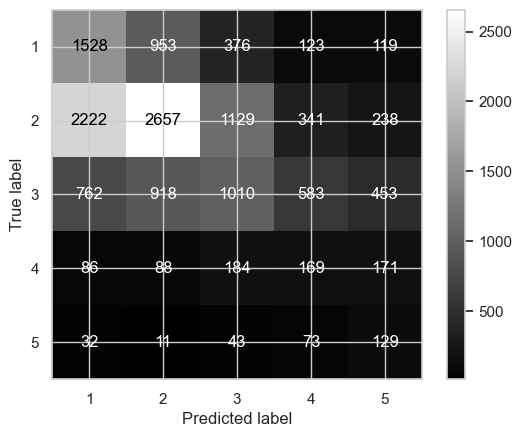

In [73]:
cm2 = confusion_matrix(y_test2, pred2, labels=clf2.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=clf2.classes_)
disp2.plot(cmap='gray');

# 3. Regresion logistica binaria

In [58]:
# Variable Dependiente binaria estricta Escogida
X3 = df_factores_sn.drop(columns = ['PB030', 'PW090', 'PW090_B2'])
y3 = df_factores_sn['PW090_B2']

# División de los datos en train y test
X_train3, X_test3, y_train3, y_test3 = train_test_split(
                                        X3,
                                        y3.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [59]:
print("Número de observaciones por clase")
print(df_factores_sn['PW090_B2'].value_counts())
print("")

print("Porcentaje de observaciones por clase")
print(100 * df_factores_sn['PW090_B2'].value_counts(normalize=True))

Número de observaciones por clase
PW090_B2
1    32213
0    15779
Name: count, dtype: int64

Porcentaje de observaciones por clase
PW090_B2
1    67.121604
0    32.878396
Name: proportion, dtype: float64


In [108]:
# Sin balanceo de clases
parameters = {
    'solver':['lbfgs', 'sag', 'saga', 'newton-cg','liblinear'],
    'multi_class':['ovr','multinomial'],
}

# model3 = LogisticRegression()

# Con balanceo de clases
model3 = LogisticRegression(solver='liblinear', random_state=7, class_weight='balanced')

clf3 = GridSearchCV(model3,
                   param_grid=parameters,
                   scoring='accuracy',
                   cv=10)

In [109]:
clf3.fit(X_train3,y_train3)

GridSearchCV(cv=10,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=7, solver='liblinear'),
             param_grid={'multi_class': ['ovr', 'multinomial'],
                         'solver': ['lbfgs', 'sag', 'saga', 'newton-cg',
                                    'liblinear']},
             scoring='accuracy')

In [110]:
print('Mejores hiperparametros:', clf3.best_params_)
print('Mejores accuracy:', clf3.best_score_)

Mejores hiperparametros: {'multi_class': 'ovr', 'solver': 'sag'}
Mejores accuracy: 0.70387571059981


In [111]:
pred3 = clf3.predict(X_test3)

In [112]:
print(confusion_matrix(y_test3, pred3))
print(accuracy_score(y_test3, pred3))
cm3 = confusion_matrix(y_test3, pred3)

[[2952 1760]
 [2540 7146]]
0.7013474093624115


In [113]:
def precision_por_clase(cm):
  """
  Calcula la precisión por clase a partir de una matriz de confusión.

  Args:
    cm: Matriz de confusión.

  Returns:
    Diccionario con la precisión de cada clase.
  """
  precisiones = {}
  total_por_clase = cm.sum(axis=0)  # Total de predicciones por clase
  total_reales_por_clase = cm.sum(axis=1)  # Total de ejemplos reales por clase

  for clase, total_predicciones in enumerate(total_por_clase):
    precision = cm[clase, clase] / total_predicciones
    precisiones[clase] = precision

  return precisiones

precisiones_por_clase = precision_por_clase(cm3)
print("Precisión por clase:", precisiones_por_clase)

Precisión por clase: {0: 0.5375091041514931, 1: 0.8023804176959354}


In [115]:
def precision_general(cm):
  """
  Calcula la precisión general del modelo a partir de una matriz de confusión.

  Args:
    cm: Matriz de confusión.

  Returns:
    Precisión general del modelo.
  """
  predicciones_correctas = cm.trace()
  total_ejemplos = cm.sum()
  precision_general = predicciones_correctas / total_ejemplos
  return precision_general

precision_modelo = precision_general(cm3)
print("Precisión general del modelo:", precision_modelo)

Precisión general del modelo: 0.7013474093624115


In [116]:
def sensibilidad_por_clase(cm):
  """
  Calcula la sensibilidad (recall) por clase a partir de una matriz de confusión.

  Args:
    cm: Matriz de confusión.

  Returns:
    Diccionario con la sensibilidad de cada clase.
  """
  sensibilidades = {}
  total_positivos_reales = cm.sum(axis=1)  # Total de ejemplos positivos reales por clase

  for clase, total_reales in enumerate(total_positivos_reales):
    vp = cm[clase, clase]  # Verdaderos positivos para la clase
    sensibilidad = vp / total_reales
    sensibilidades[clase] = sensibilidad

  return sensibilidades

sensibilidades_por_clase = sensibilidad_por_clase(cm3)
print("Sensibilidad por clase:", sensibilidades_por_clase)

Sensibilidad por clase: {0: 0.6264855687606112, 1: 0.7377658476151145}


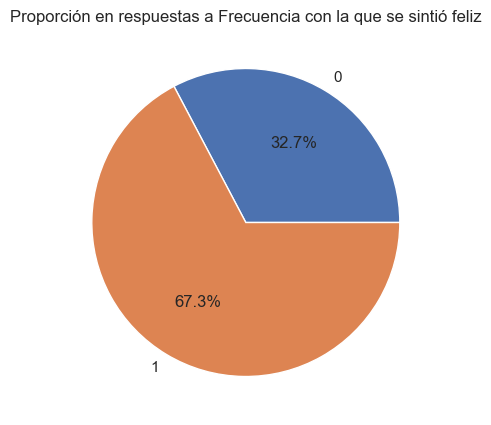

In [121]:
# Calcula los valores únicos y sus recuentos
labels, counts = np.unique(df_factores_sn.PW090_B2, return_counts=True)

mapeo_etiquetas = {
    1: "Feliz",
    0: "No Feliz",
}

# Aplica el mapeo a tus etiquetas
labels_descriptivas = [mapeo_etiquetas[label] for label in labels]

plt.figure(figsize=(5,5))

labels, counts = np.unique(y_test3, return_counts=True)
plt.pie(counts, autopct='%1.1f%%', labels = labels)
plt.title('Proporción en respuestas a Frecuencia con la que se sintió feliz')

plt.show()

#print(y_test3.value_counts())

In [128]:
especificidad = especificidad(cm3,0)
print("especificidad:", especificidad)

especificidad: 0.6264855687606112


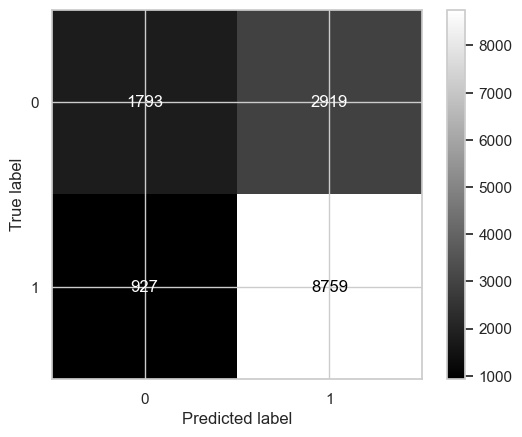

In [84]:
cm3 = confusion_matrix(y_test3, pred3, labels=clf3.classes_)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=clf3.classes_)
disp3.plot(cmap='gray');

In [86]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo

X_train3 = sm.add_constant(X_train3, prepend=True)
modelo3 = sm.Logit(endog=y_train3, exog=X_train3,)
modelo3 = modelo3.fit()
print(modelo3.summary())

Optimization terminated successfully.
         Current function value: 0.541423
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                33594
Model:                          Logit   Df Residuals:                    33578
Method:                           MLE   Df Model:                           15
Date:                Fri, 24 May 2024   Pseudo R-squ.:                  0.1457
Time:                        17:06:16   Log-Likelihood:                -18189.
converged:                       True   LL-Null:                       -21291.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8103      0.013     61.904      0.000       0.785       0.836
Factor1       -0.0628      0.

In [87]:
# Predicciones con intervalo de confianza 
# ==============================================================================
predicciones3 = modelo3.predict(exog = X_train3)

# Clasificación predicha
# ==============================================================================
clasificacion = np.where(predicciones3 < 0.5, 0, 1)
clasificacion

array([1, 1, 1, ..., 1, 1, 1])

In [88]:
# Accuracy de test del modelo 
# ==============================================================================
X_test3 = sm.add_constant(X_test3, prepend=True)
predicciones3 = modelo3.predict(exog = X_test3)
clasificacion = np.where(predicciones3 < 0.5 , 0, 1)
accuracy = accuracy_score(
            y_true    = y_test3,
            y_pred    = clasificacion,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 73.28795666064731%


In [89]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test3.ravel(),
    clasificacion,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,1794,2918
1,928,8758


In [90]:
# Calcular AUC ROC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test3, predicciones3)
print('AUC ROC:', auc)

AUC ROC: 0.7496006391876396


Logistica con balanceo

In [91]:
# Regresion logistica binomial - con balance de clases
from imblearn.under_sampling import RandomUnderSampler
underLog = RandomUnderSampler(random_state=42)





# 4. XGBoost

In [131]:
import pandas as pd
import xgboost as xgb
from numpy import array
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from urllib.request import urlretrieve

from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [132]:
# Variable Dependiente BINARIA - XGBoost
X4 = df_factores_sn.drop(columns = ['PB030', 'PW090', 'PW090_B2'])
y4 = df_factores_sn['PW090_B2']

# División de los datos en train y test
X_train4, X_test4, y_train4, y_test4 = train_test_split(
                                        X4,
                                        y4.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [133]:
X_train_mat = xgb.DMatrix(X_train4)
X_test_mat = xgb.DMatrix(X_test4)

In [134]:
rondas = 10
evaluacion = [(X_test_mat, "eval"), (X_train_mat, "train")]

In [94]:
# opcion1 - default
# model4 = XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)

# opciones - variando hiperparametros
model4 = XGBClassifier(
    booster='gbtree',
    # default #  max_depth=4,
    # default #  eta=0.01,
    objective='binary:logistic',
    nthread=2,
    # default #  n_estimators=300,  # Aumenta el número de árboles
    # default #  min_child_weight=2,  # Puedes ajustar este valor según necesites
    # default #  gamma=0.5,  # Ajusta este valor para regularización
    random_state=33,
    n_jobs=-1
)

In [135]:
# Calcular el peso de la clase minoritaria
# scale_pos_weight = Número de muestras de la clase mayoritaria / Número de muestras de la clase minoritaria
scale_pos_weight = len(y_train4[y_train4 == 0]) / len(y_train4[y_train4 == 1])

model4 = XGBClassifier(
    booster='gbtree',
    # default #  max_depth=4,
    # default #  eta=0.01,
    objective='binary:logistic',
    nthread=2,
    # default #  n_estimators=300,  # Aumenta el número de árboles
    # default #  min_child_weight=2,  # Puedes ajustar este valor según necesites
    # default #  gamma=0.5,  # Ajusta este valor para regularización
    random_state=33,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight  # Incluir el balanceo de clases
)

In [136]:
model4.fit(X_train4, y_train4)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1, nthread=2,
              num_parallel_tree=None, ...)

In [137]:
prediccion = model4.predict(X_test4)
prediccion

array([0, 1, 1, ..., 1, 0, 0])

In [138]:
def metricas(objetivo, prediccion):
    matriz_conf = confusion_matrix(objetivo, prediccion)
    score = accuracy_score(objetivo, prediccion)
    reporte = classification_report(objetivo, prediccion)
    metricas = [matriz_conf, score, reporte]
    return(metricas)

In [139]:
prediccion = [1 if i > .5 else 0 for i in prediccion]
prediccion[:10]

[0, 1, 1, 1, 0, 1, 1, 0, 1, 0]

In [140]:
metricas = metricas(y_test4, prediccion)
[print(i) for i in metricas]

[[3059 1653]
 [2450 7236]]
0.7150298652590638
              precision    recall  f1-score   support

           0       0.56      0.65      0.60      4712
           1       0.81      0.75      0.78      9686

    accuracy                           0.72     14398
   macro avg       0.68      0.70      0.69     14398
weighted avg       0.73      0.72      0.72     14398



[None, None, None]

In [141]:
# Matriz de confusión de las predicciones de test
# ==================================================
confusion_matrix = pd.crosstab(
    y_test4.ravel(),
    prediccion,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,3059,1653
1,2450,7236


In [142]:
accuracy_score(y_test4, prediccion)

0.7150298652590638

In [143]:
# AUC- ROC
scoring = 'roc_auc'

kfold = model_selection.KFold(n_splits=10, random_state=None)  # 10-fold cross-validation

results = model_selection.cross_val_score(model4, X4, y4, cv=kfold, scoring=scoring)

print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

AUC score (STD): 0.76 (0.01)


In [144]:
prediccion = np.array(prediccion)
type(prediccion)

numpy.ndarray

In [145]:
prediccion

array([0, 1, 1, ..., 1, 0, 0])

In [146]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Supongamos que y_test4 y prediccion son listas o arrays
# Asegúrate de que y_test4 y prediccion sean listas o arrays
if isinstance(y_test4, pd.DataFrame) or isinstance(prediccion, pd.DataFrame):
    y_test4 = y_test4.values.flatten()
    prediccion = prediccion.values.flatten()

# Calcula la matriz de confusión
matrix = confusion_matrix(y_test4, prediccion)

# Imprime la matriz de confusión
print(matrix)

[[3059 1653]
 [2450 7236]]


In [147]:
cm_xgb = confusion_matrix(y_test4, prediccion)
precisiones_por_clase = precision_por_clase(cm_xgb)
print("Precisión por clase:", precisiones_por_clase)

Precisión por clase: {0: 0.5552731893265566, 1: 0.8140398245021937}


In [148]:
sensibilidades_por_clase = sensibilidad_por_clase(cm_xgb)
print("Sensibilidad por clase:", sensibilidades_por_clase)

Sensibilidad por clase: {0: 0.6491935483870968, 1: 0.7470576089200909}


In [153]:
def especificidad(cm, clase_objetivo):
    """
    Calcula la especificidad para una clase específica a partir de una matriz de confusión.

    Args:
        cm: Matriz de confusión.
        clase_objetivo: Índice de la clase para la que se desea calcular la especificidad.

    Returns:
        Especificidad para la clase objetivo.
    """
    vn = cm[clase_objetivo, clase_objetivo]  # Verdaderos negativos
    fp = cm[clase_objetivo, :].sum() - vn  # Falsos positivos
    especificidad = vn / (vn + fp)
    return especificidad


In [154]:
especificidad = especificidad(cm_xgb,0)
print("especificidad:", especificidad)

especificidad: 0.6491935483870968


# Importancia de variables con Xgboost

In [116]:
# explicar las predicciones del modelo utilizando los valores SHAP
# (la misma sintaxis funciona para los modelos LightGBM, CatBoost y scikit-learn)
#pip install shap

X_test4.rename(columns={'Factor1': 'Trabajo Estable', 'Factor2': 'Alertas de Salud','Factor3': 'Jubilación','Factor4': 'Madurez','Factor5': 'Inactividad Social','Factor6': 'Asistencia Medica','Factor7': 'Inactividad Cultural','Factor8': 'No Recreación',
                        'Factor9': 'Asistencia Dental','Factor10': 'Trabajo Cuenta Propia','Factor11': 'Desempleo','Factor12': 'Relaciones','Factor13': 'Inactividad Politica','Factor14': 'Incapacidades','Factor15': 'Renta No Monetaria'}, inplace=True)

import shap
explainer = shap.TreeExplainer(model4)
shap_values = explainer.shap_values(X_test4)

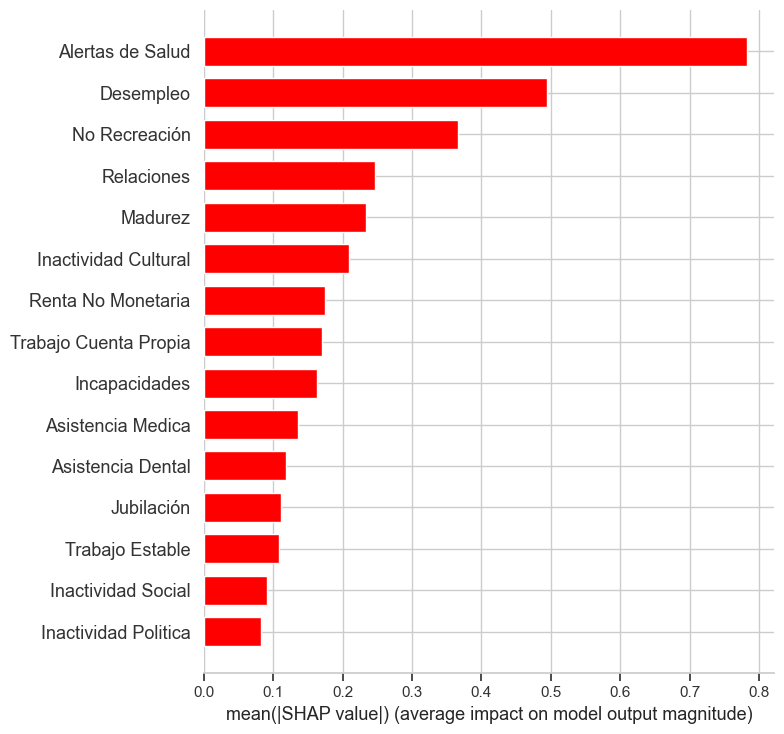

In [117]:
shap.summary_plot(shap_values, X_test4, plot_type="bar", color='red')

# Ahora XGboost con validacion cruzada repetida

In [118]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [119]:
# Configurar la validación cruzada repetida estratificada
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Realizar la validación cruzada
scores = cross_val_score(model4, X4, y4, scoring='accuracy', cv=cv, n_jobs=-1)

# Imprimir los resultados
print(f"Media de la precisión: {np.mean(scores):.3f} con desviación estándar: {np.std(scores):.3f}")

Media de la precisión: 0.739 con desviación estándar: 0.005


# Resultados

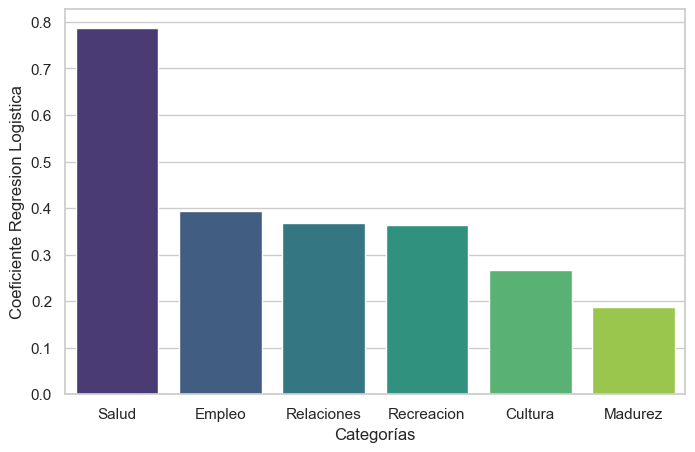

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# Datos
categorias = ['Salud', 'Empleo', 'Relaciones', 'Recreacion', 'Cultura', 'Madurez']
valores = [0.788, 0.393, 0.367, 0.364, 0.267, 0.187]

# Crear un DataFrame
import pandas as pd
data = pd.DataFrame({
    'Categorías': categorias,
    'Valores': valores
})

# Configurar el estilo
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(x='Categorías', y='Valores', data=data, palette='viridis')

# Añadiendo títulos y etiquetas
plt.ylabel('Coeficiente Regresion Logistica')

# Mostrar el gráfico
plt.show()

